# Import Necessary Library

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Task #1: Merge the 12 months of sales data into a single CSV file

In [2]:
files = [file for file in os.listdir('./Sales_Data')]

all_month_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_month_data = pd.concat([all_month_data, df])

all_month_data.to_csv("./Sales_Data/all_data.csv", index = False)

df = pd.read_csv("./Sales_Data/all_data.csv")

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Clean Data

In [3]:
nan_df = df[df.isna().any(axis = 1)]

nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.dropna()

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Augment data with additional columns

In [5]:
temp_df = df[df['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [6]:
df = df[df['Order Date'].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Task 2: Add Month Column

In [7]:
df ['Month'] = df['Order Date'].str[0:2]
df ['Month'] = df ['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add a sales Column


In [8]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [9]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [10]:
df["Sales"] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add city column

In [11]:
# use .apply()

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

# df['city'] = df['Purchase Address'].apply(lambda x: get_city(x)+ ' ('+get_state(x)+')')
df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### What was the best month for sales? How much earned that month?

In [12]:
import warnings
warnings.filterwarnings('ignore')
result = df.groupby('Month').sum()
result

,Quantity Ordered,Price Each,Sales
Month,,,
1,21806,3623536.76,3644513.46
2,26898,4377769.44,4404044.84
3,34010,5582415.66,5614200.76
4,41116,6735342.04,6781340.48
5,37334,6270250.26,6305213.50
6,30506,5124051.22,5155604.52
7,32144,5265079.12,5295551.52
8,26896,4460690.84,4488935.76
9,26218,4169984.18,4195120.26


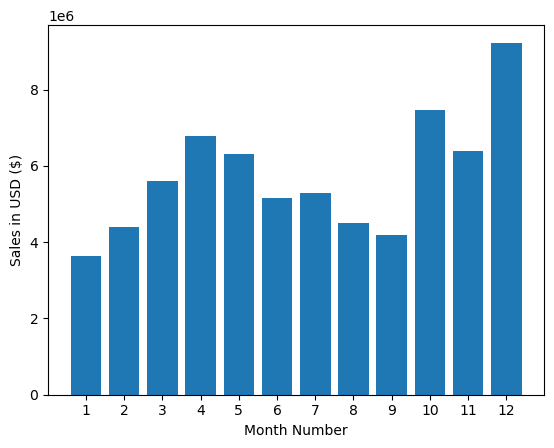

In [13]:
months = range(1,13)

plt.bar(months, result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

#### Question 2: What city the highest number of Sales

In [14]:
result = df.groupby('City').sum()
result

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),33204,5559816.40,209588,5590997.16
Austin (TX),22306,3619747.22,139658,3639163.50
Boston (MA),45056,7274819.54,282224,7323284.02
Dallas (TX),33460,5505255.64,209240,5535950.80
Los Angeles (CA),66578,10842870.46,416650,10905141.60
New York City (NY),55864,9270741.66,351482,9328634.86
Portland (ME),5500,894378.50,34288,899516.54
Portland (OR),22606,3721116.44,141242,3741464.68
San Francisco (CA),100478,16422923.48,631040,16524407.82


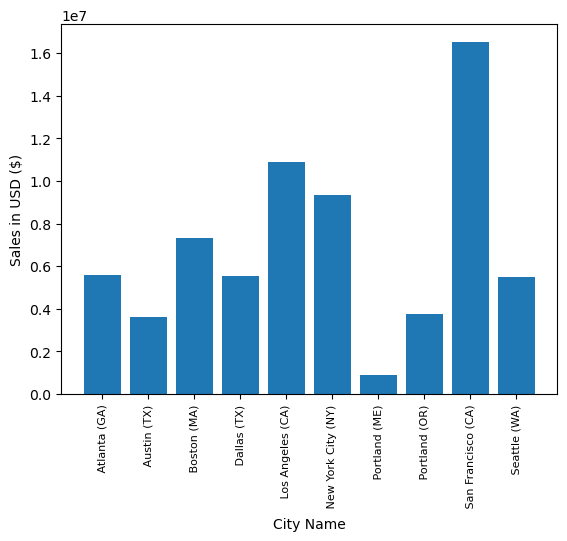

In [15]:
cities = [city for city, df1 in df.groupby('City')]

plt.bar(cities, result['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [17]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


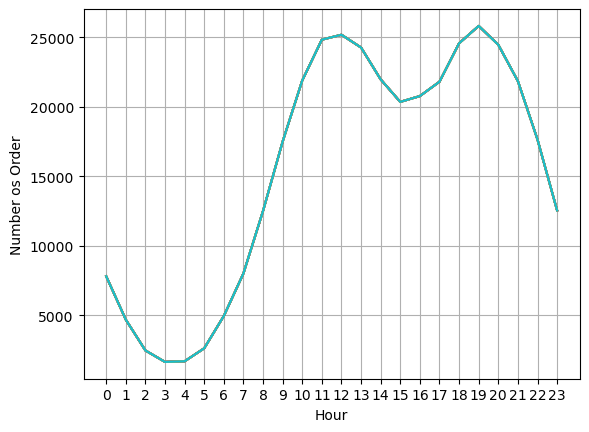

In [18]:
hours = [hour for hour, df1 in df.groupby('Hour')]

plt.plot(hours, df.groupby(['Hour']).count())

plt.xticks(hours)
plt.ylabel('Number os Order')
plt.xlabel('Hour')
plt.grid()
plt.show()

# my recomendation is 11 A.M (11) and 7 P.M (19) is the best time

#### Question 4: What products are most often sold together?

In [19]:
df1 = df[df['Order ID'].duplicated(keep = False)]

df1['Grouped']= df1.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

df1 =df1[['Order ID','Grouped']].drop_duplicates()
df1.head()

,Order ID,Grouped
0,176558,"USB-C Charging Cable, USB-C Charging Cable"
2,176559,"Bose SoundSport Headphones, Bose SoundSport He..."
3,176560,"Google Phone, Wired Headphones, Google Phone, ..."
5,176561,"Wired Headphones, Wired Headphones"
6,176562,"USB-C Charging Cable, USB-C Charging Cable"


In [20]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in df1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key, values in count.most_common(10):
    print(key, values)


('Lightning Charging Cable', ' Lightning Charging Cable') 20354
('AAA Batteries (4-pack)', ' AAA Batteries (4-pack)') 20319
('AA Batteries (4-pack)', ' AA Batteries (4-pack)') 20275
('USB-C Charging Cable', ' USB-C Charging Cable') 20266
('Wired Headphones', ' Wired Headphones') 17628
('Apple Airpods Headphones', ' Apple Airpods Headphones') 14958
('Bose SoundSport Headphones', ' Bose SoundSport Headphones') 12821
('27in FHD Monitor', ' 27in FHD Monitor') 7370
('iPhone', ' iPhone') 6726
('27in 4K Gaming Monitor', ' 27in 4K Gaming Monitor') 6114


#### What product sold the most? Why do you think it sold the most?

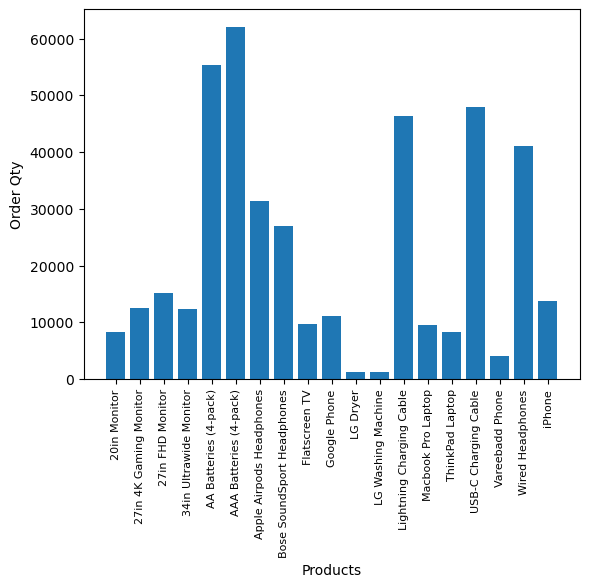

In [21]:
product_group = df.groupby('Product')
qty_ordered = product_group.sum()['Quantity Ordered']


products = [product for product, df1 in product_group]

plt.bar(products, qty_ordered)
plt.xticks(products, rotation = 'vertical', size = 8)
plt.ylabel('Order Qty')
plt.xlabel('Products')
plt.show()


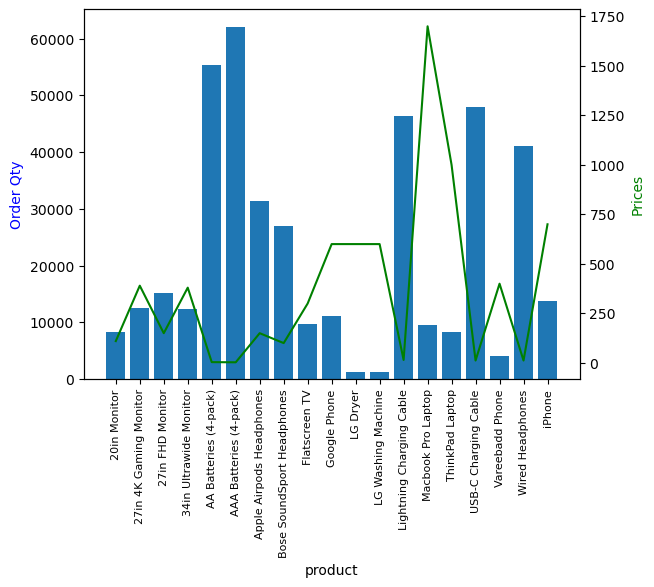

In [22]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, qty_ordered)
ax2.plot(products, prices, 'g-')

ax1.set_xlabel('product')
ax1.set_ylabel('Order Qty', color='b')
ax2.set_ylabel('Prices', color='g')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)
plt.show()
